Populating the interactive namespace from numpy and matplotlib


<Container object of 3 artists>

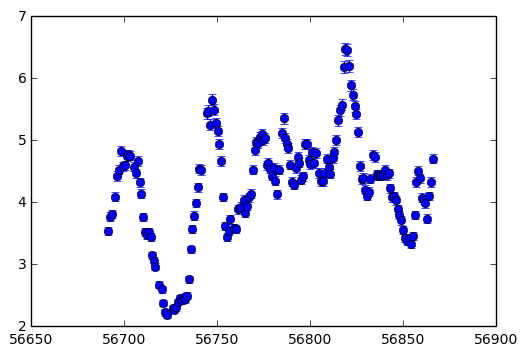

In [1]:
import numpy as np
import sys
import getopt
sys.path.insert(1,"/usr/local/science/clag/")
import clag
%pylab inline

from scipy.stats import norm
from scipy.stats import lognorm
from scipy.optimize import curve_fit
import numpy.fft

ref_file="lc/1367A.lc"
echo_file="lc/3471A.lc"


dt = 0.01
t1, l1, l1e = np.loadtxt(ref_file).T
errorbar(t1, l1, yerr=l1e, fmt='o')

In [2]:


fqL = np.array([0.0049999999, 0.018619375, 0.044733049, 0.069336227, 0.10747115, 0.16658029, 
                0.25819945, 0.40020915, 0.62032418])
# fqL = np.logspace(np.log10(0.0006),np.log10(1.2),11)
nfq = len(fqL) - 1
fqd = 10**(np.log10( (fqL[:-1]*fqL[1:]) )/2.)


fqL




array([ 0.005     ,  0.01861938,  0.04473305,  0.06933623,  0.10747115,
        0.16658029,  0.25819945,  0.40020915,  0.62032418])

In [3]:
P1 = clag.clag('psd10r', [t1], [l1], [l1e], dt, fqL)
p1 = np.ones(nfq)
p1, p1e = clag.optimize(P1, p1)

   1 4.342e-01 5.077e+01 inf -- -5.530e+02 -- 1 1 1 1 1 1 1 1
   2 7.674e-01 5.065e+01 8.300e+01 -- -4.700e+02 -- 0.653018 0.587019 0.568277 0.567457 0.566281 0.566085 0.565773 0.566163
   3 3.298e+00 5.043e+01 8.075e+01 -- -3.893e+02 -- 0.414806 0.209135 0.141159 0.13784 0.133393 0.132728 0.131612 0.132761
   4 1.572e+00 5.010e+01 7.754e+01 -- -3.117e+02 -- 0.322539 -0.0834456 -0.273066 -0.284295 -0.297612 -0.299435 -0.302479 -0.300412
   5 5.908e-01 4.964e+01 7.386e+01 -- -2.379e+02 -- 0.302357 -0.214604 -0.654658 -0.688754 -0.723838 -0.729279 -0.736418 -0.733888
   6 3.713e-01 4.877e+01 6.953e+01 -- -1.683e+02 -- 0.284419 -0.200357 -0.96379 -1.05472 -1.13798 -1.15477 -1.17031 -1.16748
   7 2.709e-01 4.671e+01 6.269e+01 -- -1.056e+02 -- 0.277768 -0.185001 -1.13047 -1.34026 -1.52128 -1.56845 -1.6043 -1.60101
   8 2.135e-01 4.361e+01 5.281e+01 -- -5.282e+01 -- 0.277012 -0.185189 -1.16375 -1.49463 -1.83211 -1.9477 -2.03737 -2.03476
   9 1.764e-01 3.767e+01 4.019e+01 -- -1.264e+01 -- 0.2

In [4]:
p1, p1e = clag.errors(P1, p1, p1e)

	### errors for param 0 ###
+++ 3.525e+01 3.480e+01 3.006e-01 5.395e-01 0.891 +++
+++ 3.525e+01 3.431e+01 3.006e-01 6.590e-01 1.87 +++
+++ 3.525e+01 3.458e+01 3.006e-01 5.993e-01 1.34 +++
+++ 3.525e+01 3.469e+01 3.006e-01 5.694e-01 1.11 +++
+++ 3.525e+01 3.475e+01 3.006e-01 5.545e-01 0.997 +++
	### errors for param 1 ###
+++ 3.525e+01 3.476e+01 -1.781e-01 2.430e-02 0.973 +++
+++ 3.525e+01 3.421e+01 -1.781e-01 1.255e-01 2.07 +++
+++ 3.525e+01 3.451e+01 -1.781e-01 7.491e-02 1.48 +++
+++ 3.525e+01 3.464e+01 -1.781e-01 4.961e-02 1.21 +++
+++ 3.525e+01 3.470e+01 -1.781e-01 3.696e-02 1.09 +++
+++ 3.525e+01 3.473e+01 -1.781e-01 3.063e-02 1.03 +++
+++ 3.525e+01 3.475e+01 -1.781e-01 2.747e-02   1 +++
	### errors for param 2 ###
+++ 3.525e+01 3.511e+01 -1.191e+00 -1.074e+00 0.276 +++
+++ 3.525e+01 3.495e+01 -1.191e+00 -1.016e+00 0.598 +++
+++ 3.525e+01 3.485e+01 -1.191e+00 -9.870e-01 0.8 +++
+++ 3.525e+01 3.479e+01 -1.191e+00 -9.725e-01 0.91 +++
+++ 3.525e+01 3.476e+01 -1.191e+00 -9.652e-01 0.96

<Container object of 3 artists>

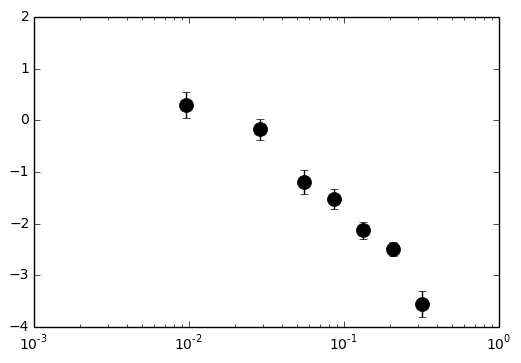

In [5]:
xscale('log'); ylim(-4,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="black")


<Container object of 3 artists>

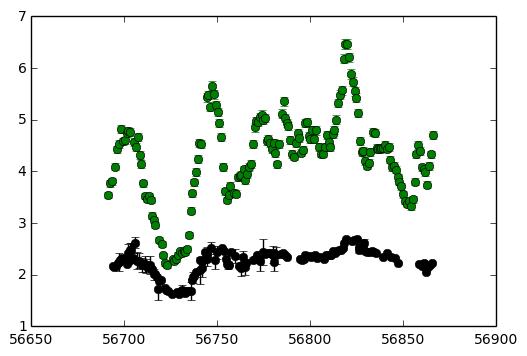

In [6]:
t2, l2, l2e = np.loadtxt(echo_file).T
errorbar(t1, l1, yerr=l1e, fmt='o', color="green")
errorbar(t2, l2, yerr=l2e, fmt='o', color="black")

In [7]:
P2 = clag.clag('psd10r', [t2], [l2], [l2e], dt, fqL)
p2 = np.ones(nfq)
p2, p2e = clag.optimize(P2, p2)

   1 4.362e-01 5.425e+01 inf -- -3.468e+02 -- 1 1 1 1 1 1 1 1
   2 7.747e-01 5.347e+01 7.019e+01 -- -2.766e+02 -- 0.58045 0.569962 0.564602 0.563764 0.567626 0.565054 0.565279 0.564008
   3 3.447e+00 5.213e+01 6.905e+01 -- -2.076e+02 -- 0.198681 0.140203 0.130333 0.127063 0.134237 0.12998 0.131082 0.127044
   4 1.448e+00 4.998e+01 6.682e+01 -- -1.408e+02 -- -0.0825582 -0.283347 -0.300715 -0.310826 -0.299703 -0.304649 -0.30132 -0.310849
   5 5.884e-01 4.684e+01 6.330e+01 -- -7.746e+01 -- -0.194194 -0.676998 -0.726162 -0.750752 -0.733583 -0.738758 -0.729946 -0.74976
   6 3.739e-01 4.258e+01 5.850e+01 -- -1.895e+01 -- -0.203226 -0.953186 -1.14229 -1.19152 -1.16459 -1.17342 -1.15279 -1.19094
   7 2.741e-01 3.740e+01 5.292e+01 -- 3.397e+01 -- -0.205901 -0.9956 -1.54459 -1.63073 -1.58521 -1.61127 -1.5669 -1.63629
   8 2.128e-01 3.180e+01 4.679e+01 -- 8.076e+01 -- -0.180502 -0.943953 -1.92935 -2.06126 -1.98071 -2.05288 -1.97074 -2.08385
   9 1.675e-01 2.595e+01 3.791e+01 -- 1.187e+02 -- -0.15

In [8]:
p2, p2e = clag.errors(P2, p2, p2e)

	### errors for param 0 ###
+++ 1.632e+02 1.627e+02 -1.193e-01 1.144e-01 0.905 +++
+++ 1.632e+02 1.622e+02 -1.193e-01 2.312e-01 1.9 +++
+++ 1.632e+02 1.625e+02 -1.193e-01 1.728e-01 1.37 +++
+++ 1.632e+02 1.626e+02 -1.193e-01 1.436e-01 1.13 +++
+++ 1.632e+02 1.627e+02 -1.193e-01 1.290e-01 1.01 +++
+++ 1.632e+02 1.627e+02 -1.193e-01 1.217e-01 0.958 +++
+++ 1.632e+02 1.627e+02 -1.193e-01 1.254e-01 0.985 +++
+++ 1.632e+02 1.627e+02 -1.193e-01 1.272e-01 0.999 +++
	### errors for param 1 ###
+++ 1.632e+02 1.627e+02 -9.449e-01 -7.407e-01 0.961 +++
+++ 1.632e+02 1.622e+02 -9.449e-01 -6.386e-01 2.04 +++
+++ 1.632e+02 1.625e+02 -9.449e-01 -6.897e-01 1.46 +++
+++ 1.632e+02 1.626e+02 -9.449e-01 -7.152e-01 1.2 +++
+++ 1.632e+02 1.627e+02 -9.449e-01 -7.279e-01 1.08 +++
+++ 1.632e+02 1.627e+02 -9.449e-01 -7.343e-01 1.02 +++
+++ 1.632e+02 1.627e+02 -9.449e-01 -7.375e-01 0.989 +++
+++ 1.632e+02 1.627e+02 -9.449e-01 -7.359e-01   1 +++
	### errors for param 2 ###
+++ 1.632e+02 1.630e+02 -2.529e+00 -2.369

<Container object of 3 artists>

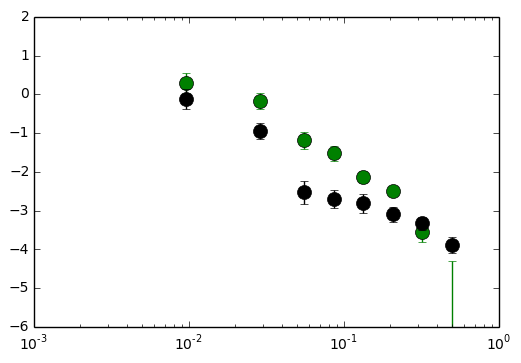

In [9]:
xscale('log'); ylim(-6,2)
errorbar(fqd, p1, yerr=p1e, fmt='o', ms=10, color="green")
errorbar(fqd, p2, yerr=p2e, fmt='o', ms=10, color="black")

In [10]:
Cx = clag.clag('cxd10r', [[t1,t2]], [[l1,l2]], [[l1e,l2e]], dt, fqL, p1, p2)
p  = np.concatenate( ((p1+p2)*0.5-0.3,p1*0+0.1) ) # a  good starting point generally
p, pe = clag.optimize(Cx, p)

   1 2.664e+02 1.060e+01 inf -- 2.187e+02 -- -0.209329 -0.861493 -2.15962 -2.40847 -2.77148 -3.0939 -3.74416 -6.23993 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1
   3 2.987e+01 1.264e+01 2.257e+00 -- 2.210e+02 -- -0.16831 -0.824919 -2.12464 -2.39488 -2.7608 -3.0706 -3.74724 -5.93993 0.0804747 0.16472 0.155918 0.19816 0.150032 0.148466 -0.0426696 2.76354
   5 3.330e+01 1.479e+01 2.062e+00 -- 2.230e+02 -- -0.134691 -0.793404 -2.09481 -2.37915 -2.74942 -3.04926 -3.74185 -6.23993 0.0666414 0.2131 0.199386 0.281712 0.193626 0.185727 -0.170109 -2.41599
   7 4.032e+02 1.707e+01 1.889e+00 -- 2.249e+02 -- -0.106698 -0.766368 -2.06929 -2.36269 -2.73774 -3.02999 -3.73105 -6.53993 0.0565128 0.250258 0.234434 0.352126 0.231411 0.214451 -0.279352 -0.654819
   9 1.006e+02 1.948e+01 1.734e+00 -- 2.267e+02 -- -0.0831017 -0.743148 -2.04735 -2.34643 -2.7261 -3.0127 -3.71739 -6.23993 0.0489265 0.27947 0.263536 0.411371 0.264011 0.236678 -0.370557 0.617417
  11 5.264e+01 2.201e+01 1.603e+00 -- 2.283e+02 -- -0.0630157 

In [11]:
%autoreload
p, pe = clag.errors(Cx, p, pe)

ERROR:root:Line magic function `%autoreload` not found.


	### errors for param 0 ###
+++ 2.475e+02 2.473e+02 8.301e-02 8.549e-02 0.306 +++
+++ 2.475e+02 2.470e+02 8.301e-02 8.673e-02 0.912 +++
+++ 2.475e+02 2.467e+02 8.301e-02 8.735e-02 1.46 +++
+++ 2.475e+02 2.469e+02 8.301e-02 8.704e-02 1.16 +++
+++ 2.475e+02 2.469e+02 8.301e-02 8.689e-02 1.03 +++
+++ 2.475e+02 2.470e+02 8.301e-02 8.681e-02 0.969 +++
+++ 2.475e+02 2.470e+02 8.301e-02 8.685e-02 0.999 +++
	### errors for param 1 ###
+++ 2.475e+02 2.473e+02 -5.760e-01 -5.720e-01 0.399 +++
+++ 2.475e+02 2.469e+02 -5.760e-01 -5.700e-01 1.13 +++
+++ 2.475e+02 2.471e+02 -5.760e-01 -5.710e-01 0.698 +++
+++ 2.475e+02 2.470e+02 -5.760e-01 -5.705e-01 0.897 +++
+++ 2.475e+02 2.470e+02 -5.760e-01 -5.702e-01 1.01 +++
	### errors for param 2 ###
+++ 2.475e+02 2.473e+02 -1.887e+00 -1.870e+00 0.291 +++
+++ 2.475e+02 2.470e+02 -1.887e+00 -1.862e+00 0.915 +++
+++ 2.475e+02 2.467e+02 -1.887e+00 -1.857e+00 1.53 +++
+++ 2.475e+02 2.469e+02 -1.887e+00 -1.859e+00 1.18 +++
+++ 2.475e+02 2.469e+02 -1.887e+00 -1.860

In [12]:
phi, phie = p[nfq:], pe[nfq:]
lag, lage = phi/(2*np.pi*fqd), phie/(2*np.pi*fqd)    
cx, cxe   = p[:nfq], pe[:nfq]

array([ 1.25569486,  2.37000041,  1.7802513 ,  1.66775218,  0.49069246,
        0.21781609, -0.44057362,  0.01545348])

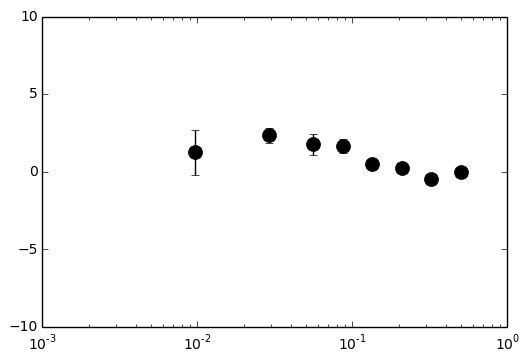

In [13]:


xscale('log'); ylim(-10,10)
errorbar(fqd, lag, yerr=lage, fmt='o', ms=10,color="black")

lag

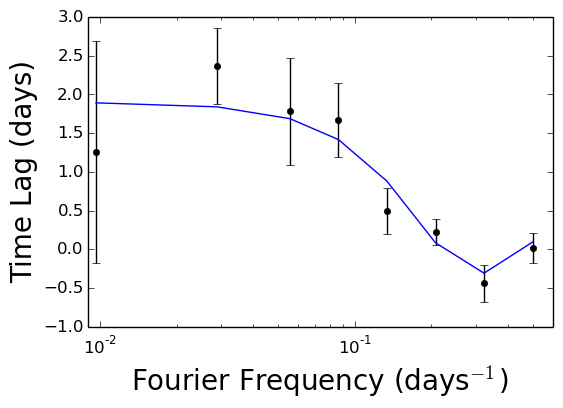

In [14]:
from scipy.optimize import curve_fit

# Define model function to be used to fit to the data above:
def tophat_time(x, *p):
    mean, width = p
    if x>(mean+width): y=0
    if x<(mean-width): y=0
    if x==(mean+width) | x==(mean-width): y=5
    return y

def tophat_freq(f, *pars):
    A,T,t0 = pars
    #return A*T*sinc(pi*f*T)*exp(-i*2*pi*f*t0)
    return A*T*sinc(pi*f*T)*cos(2*pi*f*t0)

x=np.logspace(fqd[0],fqd[-1],200)

# p0 is the initial guess for the fitting coefficients
p0 = [3, 3, 3]
coeff, var_matrix = curve_fit(tophat_freq, fqd, lag, p0)
fit = tophat_freq(fqd, *coeff)


mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
xscale('log'); xlim(.009,.6)
xlabel("Fourier Frequency (days$^{-1}$)",fontsize=20)
ylabel("Time Lag (days)",fontsize=20)


errorbar(fqd, lag, yerr=lage, fmt='o', ms=5,color="black")
plot(fqd,fit)

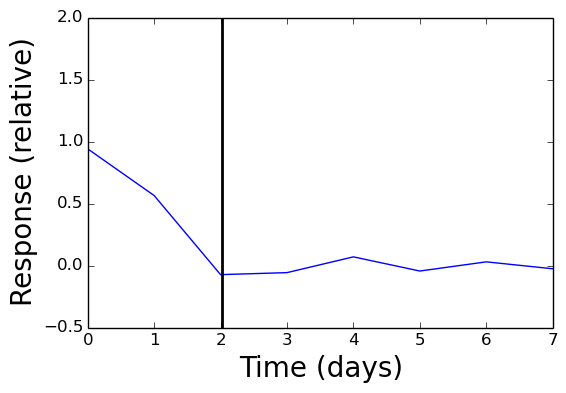

In [16]:
time_fit = irfft(fit)

mpl.rcParams['xtick.labelsize']=12
mpl.rcParams['ytick.labelsize']=12
ylabel("Response (relative)",fontsize=20)
xlabel("Time (days)",fontsize=20) 

ylim(-0.5,2)
xlim(0,7)

plot(time_fit)
plot([2.02,2.02], [-50, 50], color='k', linestyle='-', linewidth=2)